# Importing necessary libraries and Data sets

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN, LSTM, GRU,Bidirectional,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [13]:
df_train = pd.read_csv("train_E6oV3lV.csv")
df_train.head() #checking thr first 5 tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#Pre processing data using  Word cloud

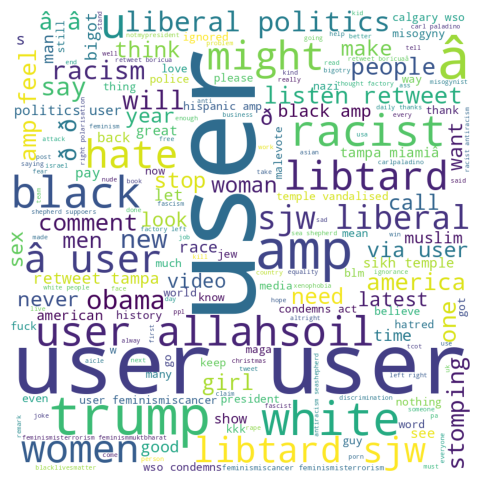

In [14]:
#A word cloud for visual representation of text data
# word cloud for hate speech tweets for label ==1  where 1 denotes the tweet is racist/sexist
wc = WordCloud(width = 800,
               height = 800,
               background_color ='white',
               min_font_size = 10)

wc.generate(''.join(df_train[df_train["label"]==1]["tweet"]))

# Display the word cloud
plt.figure(figsize = (6,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

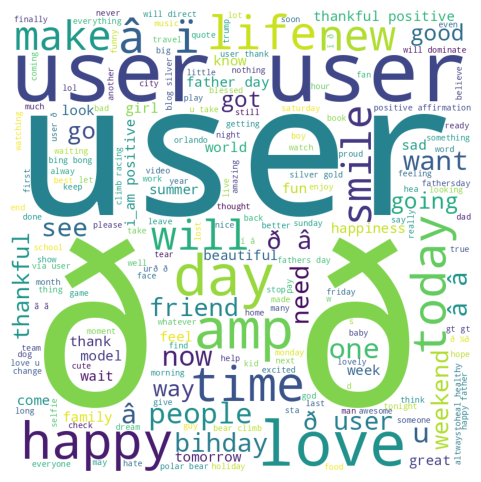

In [15]:
# 0 denotes the tweet is not racist/sexist
wc = WordCloud(width = 800,
               height = 800,
               background_color ='white',
               min_font_size = 10)

wc.generate(''.join(df_train[df_train["label"]==0]["tweet"]))

plt.figure(figsize = (6,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

CLASS DISTRIBUTION

In [16]:
df_train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

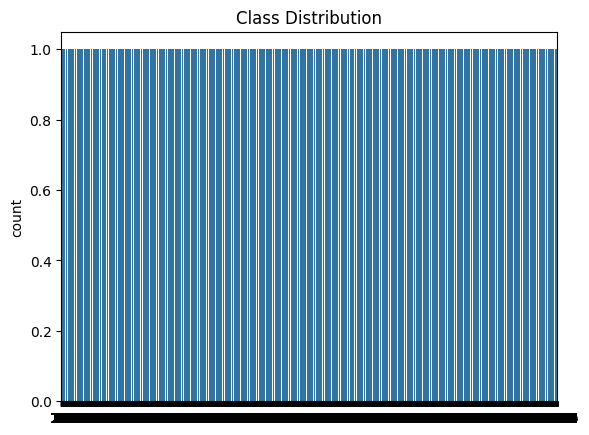

In [17]:
sns.countplot(df_train['label'])
plt.title('Class Distribution')

# As train data is imbalanced, we will do under sampling on our data,It is a technique to overcome the imbalancing of the dataset basically by  reducing the text data in more biased class equal to less biased class.

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [19]:
#SUMMARY
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [20]:
# data cleaning
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [21]:
#focusing the cleaning of the data on thhe tweets cell
df_train["tweet"] =df_train["tweet"].apply(clean_text)

In [22]:
#retriving the first 5 tweets
df_train["tweet"].head()

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit ca use cause offe...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

In [23]:
# Extract the "tweet" and "label" columns into separate variables
x = df_train["tweet"].values
y = df_train["label"].values

In [24]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

DATA BALANCING USING UNDER_SAMPLING

In [25]:
from imblearn.under_sampling import RandomUnderSampler
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

# Reshape x_train to be a 2D array
x_train_bal, y_train_bal = rus.fit_resample(x_train.reshape(-1, 1), y_train)
pd.Series(y_train_bal).value_counts()

0    1809
1    1809
Name: count, dtype: int64

In [26]:
#VIEWING THE BALANCED SAMPLES OF DATA
x_train_bal

array([['wonderful dinner dinner yum thegafford stua adventure delicious'],
       ['user want make fill u follow link amp send u dm turnthatfrownupsidedown tylerh'],
       ['user emraan hashmi alisa khan found sleeping street delhi actress'],
       ...,
       ['user giant version flag rebellion sedition flapping virginia'],
       ['scapelliti woobietuesday blocked troll promise blacklivesmatter amp'],
       ['come user amp documented liar lost base calling nazi brownshi']],
      dtype=object)

In [27]:

# Initialize an empty list to store the lengths of sentences
sent_len=[]
# Iterate over each sentence in the "tweet" column, tokenize it, and calculate its length
for sent in df_train["tweet"]:
    sent_len.append(len(word_tokenize(sent)))
    # Add the list of sentence lengths as a new column to df_train
df_train['sent_len'] = sent_len
#DISPLAY THE FIRST FEW ROWS
df_train.head()

,id,label,tweet,sent_len
0,1,0,user father dysfunctional selfish drag kid dys...,8
1,2,0,user user thanks lyft credit ca use cause offe...,14
2,3,0,bihday majesty,2
3,4,0,model love u take u time,6
4,5,0,factsguide society motivation,3


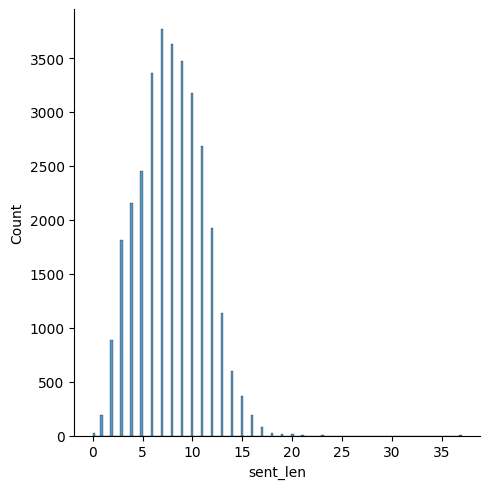

In [28]:
# Create a distribution plot of the sentence lengths
sns.displot(df_train['sent_len'])

In [29]:
#CHECKING THE MAXIMUM LENGTH
max(sent_len)

37

In [30]:

# Calculate the 95th percentile of sentence lengths
np.quantile(sent_len,0.95)

13.0

In [31]:
max_len = 13

KERA TOKENIZER

In [33]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')

# Flatten x_train_bal if it's a 2D array
x_train_bal=x_train_bal.flatten()


# Fit the Tokenizer on the training data
tok.fit_on_texts(x_train_bal)

In [34]:
#This will print a dictionary where the keys are integers (indices) and the values are the corresponding words in your vocabulary
tok.index_word

{1: 'user',
 2: 'amp',
 3: 'trump',
 4: 'love',
 5: 'like',
 6: 'u',
 7: 'day',
 8: 'white',
 9: 'black',
 10: 'new',
 11: 'libtard',
 12: 'people',
 13: 'woman',
 14: 'happy',
 15: 'one',
 16: 'time',
 17: 'racist',
 18: 'good',
 19: 'get',
 20: 'politics',
 21: 'make',
 22: 'life',
 23: 'go',
 24: 'today',
 25: 'feel',
 26: 'liberal',
 27: 'say',
 28: 'girl',
 29: 'might',
 30: 'allahsoil',
 31: 'want',
 32: 'see',
 33: 'hate',
 34: 'thankful',
 35: 'sjw',
 36: 'positive',
 37: 'video',
 38: 'bihday',
 39: 'world',
 40: 'way',
 41: 'smile',
 42: 'obama',
 43: 'ca',
 44: 'got',
 45: 'need',
 46: 'retweet',
 47: 'look',
 48: 'year',
 49: 'take',
 50: 'think',
 51: 'stop',
 52: 'listen',
 53: 'great',
 54: 'never',
 55: 'friend',
 56: 'america',
 57: 'racism',
 58: 'father',
 59: 'family',
 60: 'via',
 61: 'work',
 62: 'thing',
 63: 'best',
 64: 'would',
 65: 'bull',
 66: 'call',
 67: 'come',
 68: 'back',
 69: 'really',
 70: 'right',
 71: 'man',
 72: 'know',
 73: 'men',
 74: 'summer',
 

In [35]:
#printing the number of unique words in data
vocab_len = len(tok.index_word)
vocab_len

8005

In [37]:
#This method converts each text in the input dataset into a sequence of integers
sequences_train = tok.texts_to_sequences(x_train_bal)

In [38]:
#printing the sequences
sequences_train

[[490, 670, 670, 1448, 3148, 3149, 919, 3150],
 [1, 31, 21, 1449, 6, 139, 1998, 2, 671, 6, 1450, 3151, 3152],
 [1, 3153, 3154, 3155, 1999, 152, 3156, 672, 3157, 1451],
 [1, 2000, 77, 86, 1, 3158],
 [14, 58, 111, 111, 673, 673, 59],
 [3159, 1452, 158, 3160, 3161],
 [117, 63, 117, 55],
 [360, 31, 39, 5, 3162, 3163, 491, 3164, 131, 1453],
 [1454, 178, 1455, 1456, 277, 88, 193, 159, 769, 4],
 [79, 23, 179, 1457, 2001, 3165, 32, 1, 434, 118, 32, 255, 492, 3166, 3167],
 [770, 18, 770, 920, 1127, 180, 361, 1128, 3168],
 [921, 1458, 2002, 3169, 1129, 4, 3170, 3171, 390],
 [152, 674, 922, 1130, 1459, 54, 435, 204, 32, 16],
 [91, 3172, 1131, 193, 277, 88],
 [555, 1132, 2003, 256, 3173, 436, 1132, 4],
 [771, 153, 43, 675],
 [1133, 923, 181, 1460, 2004, 74, 1134, 3174],
 [2005, 278, 2005, 278, 2006, 55, 18, 16, 168, 220],
 [1, 6, 676, 132, 3175, 677, 3176, 772],
 [68, 391, 39, 1135, 1, 2007, 3177],
 [556, 3178, 3179, 556, 256, 22, 3180, 3181],
 [160, 3182, 678, 3183, 1136, 160, 37, 3184, 1461, 318

In [41]:
#ensure that all sequences have the same length, which is necessary when training neural networks.
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [42]:
sequences_matrix_train

array([[   0,    0,    0, ..., 3149,  919, 3150],
       [   1,   31,   21, ..., 1450, 3151, 3152],
       [   0,    0,    0, ...,  672, 3157, 1451],
       ...,
       [   0,    0,    0, ..., 3138, 3139, 1984],
       [   0,    0,    0, ..., 8003,  323,    2],
       [   0,    0,    0, ...,  547,  276, 8005]], dtype=int32)

In [43]:
# First document
sequences_matrix_train[0]

array([   0,    0,    0,    0,    0,  490,  670,  670, 1448, 3148, 3149,
        919, 3150], dtype=int32)

ARTIFICIAL NEURAL NETWORK USING GRU ARCHITECTURE

In [45]:
# Initialize the sequential model
model = Sequential()

# Add layers to the model
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(GRU(16,activation='tanh'))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 13, 500)           4003000   
                                                                 
 gru_1 (GRU)                 (None, 16)                24864     
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4028153 (15.37 MB)
Trainable params: 4028153 (15.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
#train the model
model.fit(sequences_matrix_train,y_train_bal,batch_size=100,epochs=50)

Epoch 1/50
37/37 [==============================] - 10s 107ms/step - loss: 0.6606
Epoch 2/50
37/37 [==============================] - 4s 95ms/step - loss: 0.3661
Epoch 3/50
37/37 [==============================] - 4s 101ms/step - loss: 0.0987
Epoch 4/50
37/37 [==============================] - 5s 122ms/step - loss: 0.0384
Epoch 5/50
37/37 [==============================] - 3s 95ms/step - loss: 0.0182
Epoch 6/50
37/37 [==============================] - 4s 95ms/step - loss: 0.0118
Epoch 7/50
37/37 [==============================] - 4s 109ms/step - loss: 0.0091
Epoch 8/50
37/37 [==============================] - 5s 124ms/step - loss: 0.0067
Epoch 9/50
37/37 [==============================] - 3s 95ms/step - loss: 0.0057
Epoch 10/50
37/37 [==============================] - 3s 93ms/step - loss: 0.0058
Epoch 11/50
37/37 [==============================] - 4s 112ms/step - loss: 0.0038
Epoch 12/50
37/37 [==============================] - 6s 158ms/step - loss: 0.0038
Epoch 13/50
37/37 [==========

In [49]:
# Pad the sequences to ensure they all have the same length
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [50]:
#contains the padded sequences of integers representing your test data.

sequences_matrix_test

array([[   0,    0,    0, ...,   68,  133, 1672],
       [   0,    0,    0, ..., 4655, 4655, 2527],
       [   0,    0,    0, ...,  624,   38, 2540],
       ...,
       [   0,    0,    0, ...,  459,  724,  711],
       [   0,    0,    0, ...,    5,    2, 1013],
       [   0,    0,    0, ...,  161,  153,  139]], dtype=int32)

PREDICTION AND EVALUATIO

In [51]:
#using trained model to make predictions on test data
y_pred=model.predict(sequences_matrix_test)

200/200 [==============================] - 2s 5ms/step


In [52]:
#NumPy's where function to convert the predicted probabilities (y_pred)
#into binary class predictions based on a threshold of 0.5. If the predicted
# probability is greater than or equal to 0.5,the corresponding class prediction is set to 1; otherwise, it's set to 0.
y_pred = np.where(y_pred>=0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [53]:
from sklearn.metrics import classification_report

In [54]:
# Generate a classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89      5960
           1       0.26      0.87      0.40       433

    accuracy                           0.82      6393
   macro avg       0.62      0.84      0.64      6393
weighted avg       0.94      0.82      0.86      6393



VECTORIZATION converting textual data into numerical vectors that machine learning models can understand

In [55]:
# CountVectorizer
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train_bal)
x_test_cv = cv.transform(x_test)

In [56]:
x_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
# TfidfVectorizer
tf = TfidfVectorizer()


# Fit and transform the training data
x_train_tf = tf.fit_transform(x_train_bal)

# Transform the test data using the same vocabulary as the training data
x_test_tf = tf.transform(x_test)

In [59]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

LOGIC REGRESSION

In [60]:
lr=LogisticRegression() # Initialize the Logistic Regression model
# Fit the model on the training data
lr.fit(x_train_tf,y_train_bal)

LogisticRegression()

PREDICTION AND EVALUATION

In [62]:
#predicted labels for your test data.
ypred_lr=lr.predict(x_test_tf)


In [63]:
print(accuracy_score(ypred_lr,y_test)) #calculate accuracy
print(confusion_matrix(ypred_lr,y_test)) ## Generate confusion matrix
print(classification_report(ypred_lr,y_test)) # Generate classification report

0.852338495229157
[[5077   61]
 [ 883  372]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      5138
           1       0.86      0.30      0.44      1255

    accuracy                           0.85      6393
   macro avg       0.86      0.64      0.68      6393
weighted avg       0.85      0.85      0.82      6393



SUPPORT VECTOR CLASSIFIER

In [64]:
from sklearn.svm import SVC

In [65]:
svc=SVC()

# Fit the model on the training data
svc.fit(x_train_tf,y_train_bal)

SVC()

In [67]:
#getting predictions on test data
ypred_svc=svc.predict(x_test_tf)

In [68]:
print(accuracy_score(ypred_svc,y_test)) ## Calculate accuracy
print(confusion_matrix(ypred_svc,y_test)) # Generate confusion matrix
print(classification_report(ypred_svc,y_test)) # Generate classification report

0.8657907085875176
[[5165   63]
 [ 795  370]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      5228
           1       0.85      0.32      0.46      1165

    accuracy                           0.87      6393
   macro avg       0.86      0.65      0.69      6393
weighted avg       0.86      0.87      0.84      6393



DECISION TREE CLASSIFIER

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt= DecisionTreeClassifier()
dt.fit(x_train_tf,y_train_bal)

DecisionTreeClassifier()

PREDICTION AND EVALUATION

In [71]:
ypred_dt=dt.predict(x_test_tf)

In [72]:
print(accuracy_score(ypred_dt,y_test))
print(confusion_matrix(ypred_dt,y_test))
print(classification_report(ypred_dt,y_test))

0.7351791021429689
[[4351   84]
 [1609  349]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      4435
           1       0.81      0.18      0.29      1958

    accuracy                           0.74      6393
   macro avg       0.77      0.58      0.56      6393
weighted avg       0.75      0.74      0.67      6393



#PREDICTION ON TESTING DATA

In [73]:
df_test = pd.read_csv("test_tweets_anuFYb8.csv")
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [74]:
df_test.shape

(17197, 2)

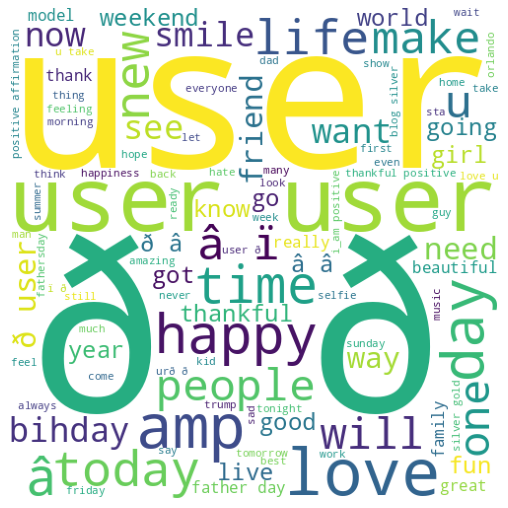

In [75]:
# WordCloud
wc = WordCloud(width = 500,
               height = 500,
               background_color ='white',
               min_font_size = 10)

wc.generate(''.join(df_test["tweet"]))

plt.figure(figsize = (8,8),dpi=80)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [76]:

#accessing tweets
y=df_test['tweet']
y

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [77]:
lbl=[]

In [79]:
def predict_tweet(tweet):

   # Transform the input tweet using CountVectorizer
    tweet_cv = cv.transform([tweet])
     # Make prediction using the Logistic Regression model
    prediction = lr.predict(tweet_cv)
    lbl.append(prediction[0])
    return prediction[0]

In [82]:
#iterating throught all the tweets to make predictions
for i in y:
  predict_tweet(i)

In [83]:
lbl

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,


In [84]:
len(lbl)

17197

In [85]:
df_test['lebel']=lbl

In [86]:
df_test.head()

,id,tweet,lebel
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,1
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


#HANDLING DATA IMBALANCE USING DATA AUGMENTATION TECHNIQUE

In [87]:
pip install nlpaug # for data augmentation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.3 MB/s eta 0:00:00


In [88]:
import nlpaug.augmenter.word as naw

In [89]:
#This module is used for part-of-speech (POS) tagging,
#which involves categorizing words in a text into their respective parts of speech
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [90]:
# Copy the original training dataframe
df_aug = df_train.copy()

# Initialize an empty list to store augmented texts
aug_texts = []
# Filter rows with label 1 for augmentation
df_balalnced = df_aug[df_aug['label'] == 1]

# Initialize the synonym augmentation object
aug = naw.SynonymAug(aug_src='wordnet')


# Get the texts from the filtered dataframe
texts = df_balalnced['tweet'].tolist()

# Iterate over each text in the filtered dataframe
for text in texts:
  # Perform synonym augmentation on each text, generating 12 augmented texts
  augmented_texts = aug.augment(text, n=12)

# Append the augmented texts to the list
  for augmented in augmented_texts:
    aug_texts.append(augmented)


# Print the total number of augmented texts
print(len(aug_texts))

# Create a temporary dataframe to store the augmented texts
temp = pd.DataFrame({'tweet': aug_texts})
print(temp) # Print the temporary dataframe

temp['label'] = 1


# Concatenate the original dataframe with the temporary dataframe
df_aug = pd.concat([df_aug, temp], axis=0)
# Reset the index of the augmented dataframe and drop the old index column
df_aug = df_aug.reset_index()
df_aug = df_aug.drop(columns=['index'])
# Delete temporary variables to free up memory
del temp, df_balalnced

26868
                                                   tweet
0      exploiter cnn vociferation michigan center sch...
1      user cnn call michigan mediate shoal wall chan...
2      user cnn call chicago mediate school bulwark c...
3      exploiter cnn call lake michigan middle school...
4      substance abuser cnn call michigan mediate sch...
...                                                  ...
26863  user sikh temple vandalize calgary wso condemn...
26864  user sikh synagogue vandalised calgary wso con...
26865  user sikh temple vandalised calgary wso condem...
26866  exploiter sikh temple vandalize calgary wso co...
26867  drug user sikh temple vandalise calgary wso co...

[26868 rows x 1 columns]


<Axes: xlabel='label', ylabel='count'>

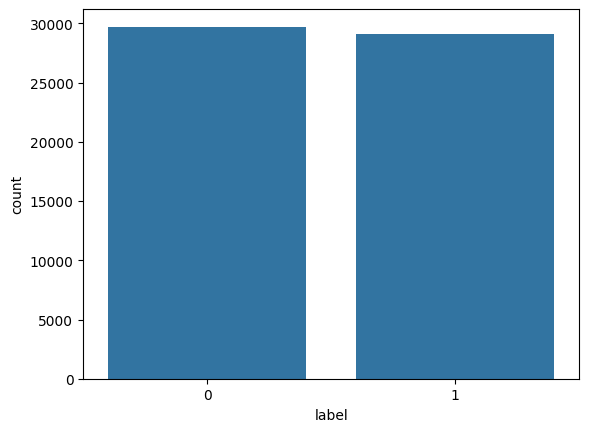

In [91]:
sns.countplot(data=df_aug, x='label')

In [92]:
df_aug.head()

,id,label,tweet,sent_len
0,1.0,0,user father dysfunctional selfish drag kid dys...,8.0
1,2.0,0,user user thanks lyft credit ca use cause offe...,14.0
2,3.0,0,bihday majesty,2.0
3,4.0,0,model love u take u time,6.0
4,5.0,0,factsguide society motivation,3.0


TRAINING AND TESTING DATA

In [93]:
x = df_aug["tweet"].values
y = df_aug["label"].values

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [95]:
max(sent_len)

37

In [96]:
np.quantile(sent_len,0.95)

13.0

In [97]:
max_len = 13

TOKENIZATION

In [98]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(x_train)

In [99]:
tok.index_word

{1: 'user',
 2: 'amp',
 3: 'love',
 4: 'day',
 5: 'u',
 6: 'trump',
 7: 'like',
 8: 'libtard',
 9: 'happy',
 10: 'get',
 11: 'new',
 12: 'white',
 13: 'people',
 14: 'time',
 15: 'black',
 16: 'woman',
 17: 'life',
 18: 'one',
 19: 'today',
 20: 'make',
 21: 'allahsoil',
 22: 'good',
 23: 'drug',
 24: 'go',
 25: 'exploiter',
 26: 'substance',
 27: 'racist',
 28: 'abuser',
 29: 'ca',
 30: 'see',
 31: 'want',
 32: 'girl',
 33: 'father',
 34: 'sjw',
 35: 'need',
 36: 'positive',
 37: 'obama',
 38: 'take',
 39: 'say',
 40: 'thankful',
 41: 'feel',
 42: 'year',
 43: 'hate',
 44: 'bihday',
 45: 'smile',
 46: 'retweet',
 47: 'work',
 48: 'politics',
 49: 'liberal',
 50: 'might',
 51: 'would',
 52: 'friend',
 53: 'think',
 54: 'via',
 55: 'great',
 56: 'listen',
 57: 'look',
 58: 'got',
 59: 'way',
 60: 'thanks',
 61: 'right',
 62: 'family',
 63: 'video',
 64: 'world',
 65: 'america',
 66: 'really',
 67: 'back',
 68: 'of',
 69: 'man',
 70: 'know',
 71: 'come',
 72: 'never',
 73: 'thing',
 74: 

In [100]:
vocab_len = len(tok.index_word)
vocab_len

32519

In [101]:
sequences_train = tok.texts_to_sequences(x_train)

In [102]:
sequences_train

[[1, 15353, 19, 1104, 15354, 11502, 395, 3836, 9789, 329, 145, 55, 15355, 928],
 [1292, 123, 7368, 16, 69, 4051, 8718, 1939, 1225, 196, 171, 54, 1],
 [6872, 36, 126],
 [23, 1, 265, 132, 7925, 3499, 1074, 6, 241, 320, 27, 98, 2690, 361],
 [1, 1, 127, 46, 557, 502, 35, 2691, 4052, 4053],
 [285, 5275, 2146, 862, 4054, 726, 8719, 5276, 672, 693, 5277],
 [2955, 9790, 11, 1, 15356, 9791, 8720],
 [8721, 230, 1529, 6873, 598, 1452, 434, 478, 1567, 361],
 [15357, 88, 4742, 29, 388, 1, 322, 181, 233, 114, 297, 15358, 101],
 [251, 889, 7, 973, 56, 46],
 [106, 387, 123, 172, 17, 60, 77, 338, 45],
 [3084, 5278, 1728, 22, 3085, 291],
 [103, 4309, 2574, 773, 3837, 299, 167, 538, 74],
 [1, 6, 299, 74, 863, 258, 12, 6394, 6, 6874, 1226, 2262, 5279, 62, 864],
 [15, 4310, 4055, 2956, 2575, 396, 962, 9792, 2464, 876],
 [58, 1105, 39, 1638, 86, 73, 222, 1638, 665],
 [1293, 11503],
 [471, 73, 16, 164, 4743, 4744],
 [2263, 7926, 177, 1175, 416, 1997, 15359],
 [2692, 87, 41, 1003, 1106, 652, 2264, 191, 9793, 

In [103]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [104]:
sequences_matrix_train

array([[15353,    19,  1104, ...,    55, 15355,   928],
       [ 1292,   123,  7368, ...,   171,    54,     1],
       [    0,     0,     0, ...,  6872,    36,   126],
       ...,
       [    0,     0,     0, ...,   653, 10080, 32516],
       [    0,     0,     0, ..., 13257, 14036, 32519],
       [  305,   103,  5659, ...,   575,  4252,   438]], dtype=int32)

RNN NETWORK

In [105]:
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(16,activation='tanh'))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 13, 500)           16260000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                8272      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16268561 (62.06 MB)
Trainable params: 16268561 (62.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
#compile
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(sequences_matrix_train,y_train,batch_size=100,epochs=25)

Epoch 1/25
163/471 [=========>....................] - ETA: 3:04 - loss: 0.0017

In [ ]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [ ]:
sequences_matrix_test

NN MODEL PREDICTION AND EVALUATION

In [ ]:
y_pred=model.predict(sequences_matrix_test)

In [ ]:
y_pred = np.where(y_pred>=0.5,1,0)
y_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))